C:\Users\eera\AppData\Local\Temp\ipykernel_13984\3068880251.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start='2019-01-01', end='2025-06-19')
[*********************100%***********************]  1 of 1 completed


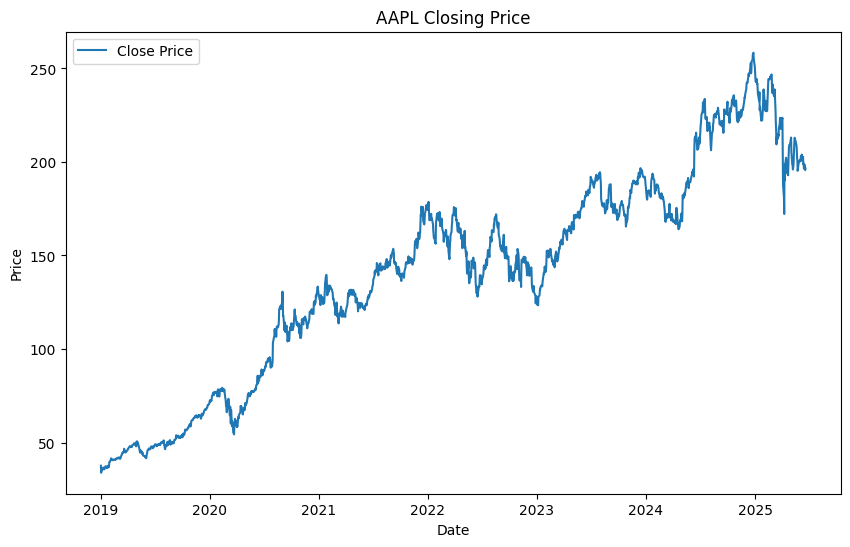

Epoch 1/20


C:\Users\eera\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0473
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0015
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.4807e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 8.3672e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 7.8290e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.2104e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.4630e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.7626e-04
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 6.4649e-04
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.2263e-04
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.3623e-04
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 7.3767e-04
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 6.6374e-04
Epoch 14/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 6.7890e-04
Epoch 15/20
40/40 ━━━━━━━━━━━━━━━━

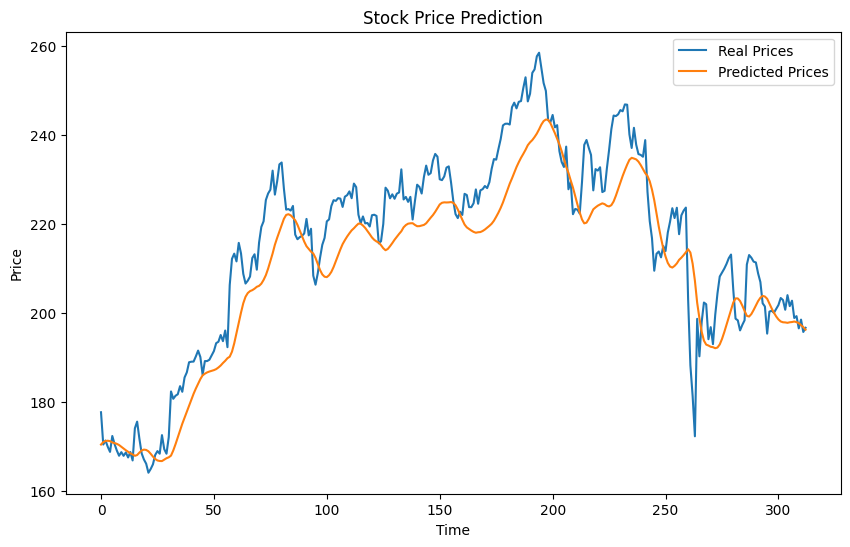

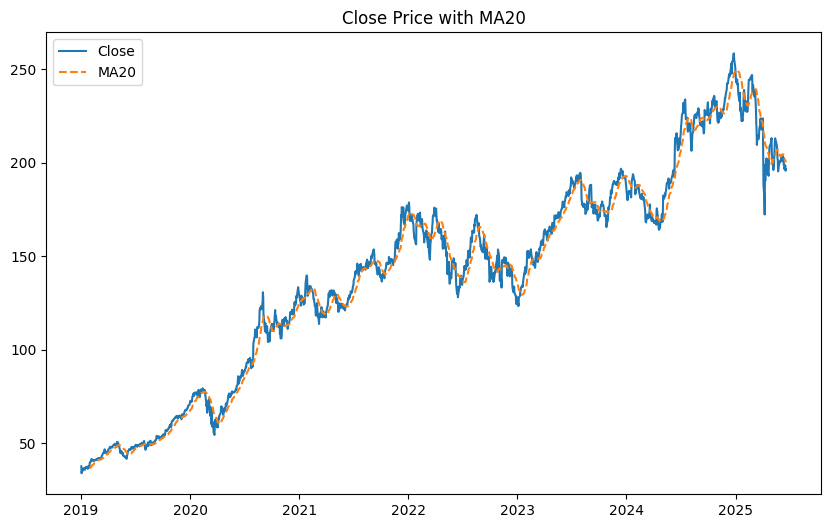

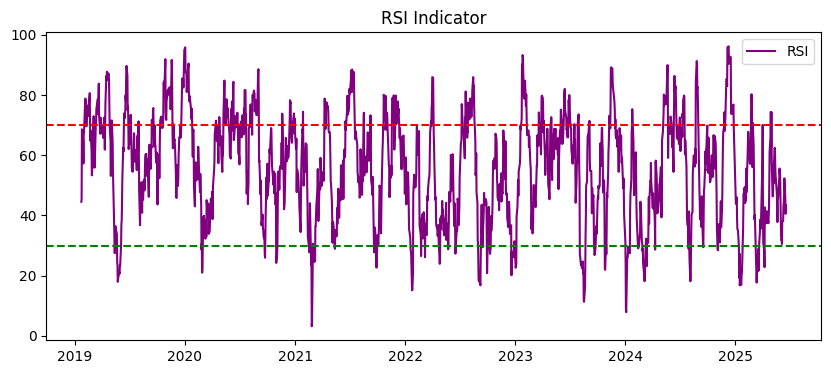

In [3]:
# Stock Price Prediction using LSTM - Full Jupyter Notebook Code

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 2. Load Stock Data
stock = 'AAPL'
data = yf.download(stock, start='2019-01-01', end='2025-06-19')

# 3. Visualize Closing Price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{stock} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 4. Normalize Closing Prices
scaler = MinMaxScaler()
data_close = data['Close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(data_close)

# 5. Create Training Sequences
sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# 6. Split into Training and Testing
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 7. Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

# 8. Compile and Train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# 9. Predict and Inverse Scale
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Real Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 11. Moving Average (MA20)
data['MA20'] = data['Close'].rolling(window=20).mean()

# 12. RSI Calculation
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# 13. Plot MA and RSI
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA20'], label='MA20', linestyle='--')
plt.title('Close Price with MA20')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title('RSI Indicator')
plt.legend()
plt.show()